<img src="img/logo.png">

# Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mylib.fonction_exploration import exploration_long
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
cyan = "\033[34m"
end = "\033[0;0m"

chemin_dispo_hab = 'src/dispo_hab_long.xlsx'
chemin_iso = 'src/iso_gouv_cleaned.xlsx'
chemin_distance = 'src/distance.xls'
chemin_peace = 'src/peace_index_long.xlsx'
chemin_pib = 'src/pib_long.xlsx'
chemin_pop = 'src/population_long.xlsx'
chemin_idh = 'src/hdi_long.xlsx'
chemin_exp = 'src/exp_long.xlsx'
chemin_prod = 'src/prod_long.xlsx'
chemin_imp = 'src/imp_long.xlsx'
chemin_delay = 'src/border_time_hours_long.xlsx'
chemin_under_nour = 'src/under_nourishment_long.xlsx'
chemin_tariff = 'src/tariff_long.xlsx'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Loading paths

In [2]:
dispo_hab = pd.read_excel(chemin_dispo_hab)
iso = pd.read_excel(chemin_iso)
distance = pd.read_excel(chemin_distance)
pib = pd.read_excel(chemin_pib)
pop = pd.read_excel(chemin_pop)
hdi = pd.read_excel(chemin_idh)
peace = pd.read_excel(chemin_peace)
prod = pd.read_excel(chemin_prod)
exp = pd.read_excel(chemin_exp)
imp = pd.read_excel(chemin_imp)
adm = pd.read_excel(chemin_delay)
tariff = pd.read_excel(chemin_tariff)
under_nour = pd.read_excel(chemin_under_nour)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Checking files

## **dispo_hab**

In [4]:
dispo_hab.sample()

,iso,Country,Product,Year,Unity,Vegetables disponibility (kg/cap/year)
11251,MDV,Maldives,"Légumes, autres",2018,kg,49.06


### *Feature engineering*

In [5]:
# remodelage du DataFrame et création de nouvelle variable 
dispo_hab = dispo_hab.groupby(['Year', 'Country', 'iso']).sum()
dispo_hab = dispo_hab.reset_index()
dispo_hab['Enough veg intake (> 91.25 kg/cap/year)'] = (dispo_hab['Vegetables disponibility (kg/cap/year)'] > 91.25) * 1
dispo_hab.sample()

,Year,Country,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year)
193,2011,Belgique,BEL,211.52,1


## **iso**

In [6]:
iso.sample()

,Country,iso
115,Mexique,MEX


## **distance**

In [7]:
distance.sample()

,iso,Distance (km)
168,QAT,4873.77


## **pib**

In [8]:
pib.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
126,Mozambique,MOZ,476.25,532.29,575.82,611.49,660.15,707.53,779.82,840.73,...,1051.38,1098.26,1149.88,1300.83,1370.24,1287.23,1323.79,1339.43,1300.51,1347.72


### *Stacking*

In [9]:
# remodelage du DataFrame
pib = pib.set_index(['Country', 'iso'])
pib = pib[pib.columns[0:]].stack()
pib = pib.reset_index()
pib.sample()

,Country,iso,level_2,0
645,Bhoutan,BTN,2007,5178.81


In [10]:
# renommage du DataFrame
pib.rename(columns = {'level_2': 'Year', 0: 'Gdp/cap'}, inplace=True)
pib = pib.groupby(['Year', 'Country', 'iso']).sum()
pib = pib.reset_index()
pib.sample()

,Year,Country,iso,Gdp/cap
3625,2017,Grèce,GRC,28604.86


## **population**

In [11]:
pop.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Arménie,ARM,3168523,3133133,3105037,3084102,3065745,3047246,3026486,3004393,...,2914421,2901385,2889930,2878595,2865835,2851923,2836557,2820602,2805608,2790974


### *Stacking*

In [12]:
# remodelage du DataFrame
pop = pop.set_index(['Country', 'iso'])
pop = pop[pop.columns[0:]].stack()
pop = pop.reset_index()
pop.sample()

,Country,iso,level_2,0
4275,Tchad,TCD,2007,10722731


In [13]:
# renommage du DataFrame
pop.rename(columns = {'level_2': 'Year', 0: 'Population'}, inplace=True)
pop = pop.groupby(['Year', 'Country', 'iso']).sum()
pop = pop.reset_index()
pop.sample()

,Year,Country,iso,Population
3474,2015,République démocratique populaire lao,LAO,6787419


## **hdi**

In [14]:
hdi.sample()

,Country,iso,Year,HDI
3263,Sierra Leone,SLE,2005,0.37


## **peace**

In [15]:
peace.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
85,Libya,LBY,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,...,2.77,2.83,2.58,2.51,2.97,3.16,3.31,3.27,3.27,3.26


### Stacking

In [16]:
# remodelage du DataFrame
peace = peace.set_index(['Country', 'iso'])
peace = peace[peace.columns[0:]].stack()
peace = peace.reset_index()
peace.sample()

,Country,iso,level_2,0
2539,Russia,RUS,2019,3.09


In [17]:
# renommage du DataFrame
peace.rename(columns = {'level_2': 'Year', 0: 'Peace_index'}, inplace=True)
peace = peace.groupby(['Year', 'Country', 'iso']).sum()
peace = peace.reset_index()
peace.sample()

,Year,Country,iso,Peace_index
557,2003,Ireland,IRL,1.37


## **production**

In [18]:
prod.sample()

,iso,Country,Product,Year,Unity,Value
8898,MWI,Malawi,Légumineuses Autres et produits,2015,Milliers de tonnes,429


### *Feature engineering*

In [19]:
# création de nouvelle variable
prod = prod.groupby(['Year', 'Country', 'iso']).sum()
prod = prod.reset_index().rename(columns = {'Value': 'Production'})
prod['Production'] = prod['Production'] * 1_000_000
prod.sample()

,Year,Country,iso,Production
776,2014,Guinée,GIN,3148000000


## **exportations**

In [20]:
exp.sample()

,iso,Country,Produit,Year,Unité,Value
14957,SUR,Suriname,Oignons,2020,Milliers de tonnes,0


### *Feature engineering*

In [21]:
# création de nouvelle variable
exp = exp.groupby(['Year', 'Country', 'iso']).sum()
exp = exp.reset_index().rename(columns = {'Value': 'Exportations'})
exp['Exportations'] = exp['Exportations'] * 1_000_000
exp.sample()

,Year,Country,iso,Exportations
431,2012,Japon,JPN,13000000


## **importations**

In [22]:
imp.sample()

,iso,Country,Product,Year,Unity,Value
10468,LBN,Liban,Pois,2010,Milliers de tonnes,1


### *Feature engineering*

In [23]:
# création de nouvelle variable
imp = imp.groupby(['Year', 'Country', 'iso']).sum()
imp = imp.reset_index().rename(columns = {'Value': 'Importations'})
imp['Importations'] = imp['Importations'] * 1_000_000
imp.sample()

,Year,Country,iso,Importations
314,2011,République démocratique populaire lao,LAO,15000000


## **customs administrative tasks duration**

In [24]:
adm.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
125,Mauritius,MUS,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,...,48.00,48.00,48.00,48.00,48.00,38.00,24.00,24.00,24.00,24.00


### *Stacking*

In [25]:
# remodelage du DataFrame
adm = adm.set_index(['Country', 'iso'])
adm = adm[adm.columns[0:]].stack()
adm = adm.reset_index()
adm.sample()

,Country,iso,level_2,0
1349,"Micronesia, Fed. Sts.",FSM,2007,36.00


In [26]:
# renommage du DataFrame
adm.rename(columns = {'level_2': 'Year', 0: 'Customs duration (h)'}, inplace=True)
adm = adm.groupby(['Year', 'Country', 'iso']).sum()
adm = adm.reset_index()
adm.sample()

,Year,Country,iso,Customs duration (h)
583,2002,Suriname,SUR,108.00


## **under-nourishment**

In [27]:
under_nour.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
39,Petits états des Caraïbes,CSS,8.20,8.20,8.01,8.17,8.23,8.25,8.12,8.32,...,8.10,8.01,7.83,8.07,7.86,7.71,7.19,6.97,6.81,6.81


### *Stacking*

In [28]:
# remodelage du DataFrame
under_nour = under_nour.set_index(['Country', 'iso'])
under_nour = under_nour[under_nour.columns[0:]].stack()
under_nour = under_nour.reset_index()
under_nour.sample()

,Country,iso,level_2,0
2694,Niger,NER,2010,18.52


In [29]:
# renommage du DataFrame
under_nour.rename(columns = {'level_2': 'Year', 0: 'Under-nourishment (%)'}, inplace=True)
under_nour = under_nour.groupby(['Year', 'Country', 'iso']).sum()
under_nour = under_nour.reset_index()
under_nour.sample()

,Year,Country,iso,Under-nourishment (%)
291,2001,Mauritanie,MRT,8.30


## **customs tariff**

In [30]:
tariff.sample()

,Country,iso,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Afghanistan,AFG,3.86,3.86,3.86,3.86,3.86,6.16,6.16,6.18,...,6.95,6.95,6.95,6.95,6.95,6.95,8.38,8.38,8.38,8.38


### *Stacking*

In [31]:
# remodelage du DataFrame
tariff = tariff.set_index(['Country', 'iso'])
tariff = tariff[tariff.columns[0:]].stack()
tariff = tariff.reset_index()
tariff.sample()

,Country,iso,level_2,0
507,Bolivia,BOL,2001,9.27


In [32]:
# renommage du DataFrame
tariff.rename(columns = {'level_2': 'Year', 0: 'Customs tax (%)'}, inplace=True)
tariff = tariff.groupby(['Year', 'Country', 'iso']).sum()
tariff = tariff.reset_index()
tariff.sample()

,Year,Country,iso,Customs tax (%)
2287,2011,Romania,ROU,2.30


# Merging of tables

In [33]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(dispo_hab, distance, 'iso')

In [34]:
# jointure
df = dispo_hab.merge(distance, on='iso', how='left')
df.sample()

,Year,Country,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km)
789,2014,Kazakhstan,KAZ,336.97,1,5005.41


In [35]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, pib, ['iso', 'Year'])

In [36]:
# jointure
df = df.merge(pib, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap
112,2010,Oman,OMN,168.26,1,5495.84,Oman,53255.61


In [37]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, pop, ['iso', 'Year'])

In [38]:
# jointure
df = df.merge(pop, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country,Population
794,2014,Malte,MLT,258.78,1,1545.20,Malte,34349.26,Malte,434558


In [39]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, hdi, ['iso', 'Year'])

In [40]:
# jointure
df = df.merge(hdi, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,Country_y,HDI
372,2012,Comores,COM,130.23,1,7678.14,Comores,2655.73,Comores,684553,Comoros,0.53


In [41]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, peace, ['iso', 'Year'])

In [42]:
# jointure
df = df.merge(peace, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,Country_y,HDI,Country,Peace_index
394,2012,Ouzbékistan,UZB,315.37,1,5147.52,Ouzbékistan,6061.95,Ouzbékistan,29774500,Uzbekistan,0.69,Uzbekistan,2.22


In [43]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, prod, ['iso', 'Year'])

In [44]:
# jointure
df = df.merge(prod, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,Country_y,HDI,Country_x,Peace_index,Country_y,Production
1346,2019,Albanie,ALB,385.26,1,1499.45,Albanie,13973.05,Albanie,2854191,Albania,0.81,Albania,1.81,Albanie,1930000000


In [45]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, exp, ['iso', 'Year'])

In [46]:
# jointure
df = df.merge(exp, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,Country_y,HDI,Country_x,Peace_index,Country_y,Production,Country,Exportations
1158,2017,Sierra Leone,SLE,258.22,1,4514.96,Sierra Leone,1593.48,Sierra Leone,7677565,Sierra Leone,0.47,Sierra Leone,1.72,Sierra Leone,4897000000,Sierra Leone,1000000


In [47]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, imp, ['iso', 'Year'])

In [48]:
# jointure
df = df.merge(imp, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,Country_y,HDI,Country_x,Peace_index,Country_y,Production,Country_x,Exportations,Country_y,Importations
419,2012,Sri Lanka,LKA,79.85,0,8431.75,Sri Lanka,10618.57,Sri Lanka,20425000,Sri Lanka,0.75,Sri Lanka,2.15,Sri Lanka,1448000000,Sri Lanka,39000000,Sri Lanka,531000000


In [49]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, adm, ['iso', 'Year'])

In [50]:
# jointure
df = df.merge(adm, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,...,Country_x,Peace_index,Country_y,Production,Country_x,Exportations,Country_y,Importations,Country,Customs duration (h)
313,2012,Burkina Faso,BFA,111.65,1,3882.36,Burkina Faso,1568.07,Burkina Faso,17113732,...,Burkina Faso,1.88,Burkina Faso,2833000000,Burkina Faso,62000000,Burkina Faso,55000000,Burkina Faso,74.50


In [51]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, under_nour, ['iso', 'Year'])

In [52]:
# jointure
df = df.merge(under_nour, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,...,Country_y,Production,Country_x,Exportations,Country_y,Importations,Country_x,Customs duration (h),Country_y,Under-nourishment (%)
327,2012,El Salvador,SLV,176.62,1,9073.20,El Salvador,6622.57,El Salvador,6161289,...,El Salvador,1236000000,El Salvador,90000000,El Salvador,864000000,El Salvador,14.00,El Salvador,10.70


In [53]:
# utilisation de la fonction df_merge pour pré-visualiser la jointure -> df_merge(df, tariff, ['iso', 'Year'])

In [54]:
# jointure
df = df.merge(tariff, on=['iso', 'Year'], how='inner')
df.sample()

,Year,Country_x,iso,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Distance (km),Country_y,Gdp/cap,Country_x,Population,...,Country_x,Exportations,Country_y,Importations,Country_x,Customs duration (h),Country_y,Under-nourishment (%),Country,Customs tax (%)
1408,2019,Ouganda,UGA,166.25,1,5867.33,Ouganda,2344.98,Ouganda,42949080,...,Ouganda,470000000,Ouganda,225000000,Uganda,59.00,Ouganda,19.77,Uganda,12.41


In [55]:
# aperçu du nom des colonnes
df.columns

Index(['Year', 'Country_x', 'iso', 'Vegetables disponibility (kg/cap/year)',
       'Enough veg intake (> 91.25 kg/cap/year)', 'Distance (km)', 'Country_y',
       'Gdp/cap', 'Country_x', 'Population', 'Country_y', 'HDI', 'Country_x',
       'Peace_index', 'Country_y', 'Production', 'Country_x', 'Exportations',
       'Country_y', 'Importations', 'Country_x', 'Customs duration (h)',
       'Country_y', 'Under-nourishment (%)', 'Country', 'Customs tax (%)'],
      dtype='object')

In [56]:
# création du DataFrame 'final_df'
final_df = df.copy()
final_df = final_df[['iso', 'Country', 'Year', 'Population', 'Under-nourishment (%)', 'HDI', 'Peace_index', 
                     'Vegetables disponibility (kg/cap/year)', 'Enough veg intake (> 91.25 kg/cap/year)', 'Production', 'Exportations',
                     'Importations', 'Customs duration (h)', 'Customs tax (%)', 'Distance (km)', 'Gdp/cap']]
final_df

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap
0,AFG,Afghanistan,2010,28189672,21.20,0.45,3.16,54.09,0,2177000000,176000000,34000000,48.00,6.95,5500.66,1771.20
1,ZAF,South Africa,2010,51784921,3.70,0.68,2.33,180.15,1,17804000000,1629000000,386000000,92.00,7.31,8769.68,12771.91
2,ALB,Albania,2010,2913021,5.80,0.75,1.88,291.20,1,1465000000,34000000,126000000,14.00,5.78,1499.45,9627.77
3,DZA,Algeria,2010,35856344,4.30,0.72,2.39,228.66,1,8728000000,13000000,3132000000,80.00,14.23,1233.81,13141.12
4,DEU,Germany,2010,81776930,2.50,0.93,1.61,153.51,1,17903000000,5800000000,8456000000,36.00,2.78,789.58,38952.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,EGY,"Egypt, Arab Rep.",2020,107465134,5.10,0.73,2.48,244.80,1,31403000000,2307000000,8520000000,48.00,14.43,3052.49,12004.13
1603,ARE,United Arab Emirates,2020,9287289,5.60,0.91,1.75,98.35,1,312000000,986000000,3229000000,27.00,4.19,5180.43,71374.18
1604,ECU,Ecuador,2020,17588595,15.40,0.73,2.08,94.75,1,2311000000,147000000,234000000,96.00,8.88,9561.10,10924.18
1605,USA,United States,2020,331501080,2.50,0.92,2.26,188.75,1,419418000000,62049000000,17388000000,1.50,2.87,7456.77,63027.68


In [57]:
# pour information, affichage du nombre de pays présent dans le DataFrame final
final_df.Country.nunique()

149

## Feature engineering : population evolution

In [58]:
# création de nouveaux DataFrames avec aggrégation de données par année
pop_2006 = pop[pop['Year'] == 2006].rename(columns = {'Population': 'Population 2006'}).drop(columns=['Year', 'Country'])
pop_2007 = pop[pop['Year'] == 2007].rename(columns = {'Population': 'Population 2007'}).drop(columns=['Year', 'Country'])
pop_2008 = pop[pop['Year'] == 2008].rename(columns = {'Population': 'Population 2008'}).drop(columns=['Year', 'Country'])
pop_2009 = pop[pop['Year'] == 2009].rename(columns = {'Population': 'Population 2009'}).drop(columns=['Year', 'Country'])
pop_2010 = pop[pop['Year'] == 2010].rename(columns = {'Population': 'Population 2010'}).drop(columns=['Year', 'Country'])
pop_2011 = pop[pop['Year'] == 2011].rename(columns = {'Population': 'Population 2011'}).drop(columns=['Year', 'Country'])
pop_2012 = pop[pop['Year'] == 2012].rename(columns = {'Population': 'Population 2012'}).drop(columns=['Year', 'Country'])
pop_2013 = pop[pop['Year'] == 2013].rename(columns = {'Population': 'Population 2013'}).drop(columns=['Year', 'Country'])
pop_2014 = pop[pop['Year'] == 2014].rename(columns = {'Population': 'Population 2014'}).drop(columns=['Year', 'Country'])
pop_2015 = pop[pop['Year'] == 2015].rename(columns = {'Population': 'Population 2015'}).drop(columns=['Year', 'Country'])
pop_2016 = pop[pop['Year'] == 2016].rename(columns = {'Population': 'Population 2016'}).drop(columns=['Year', 'Country'])
pop_2016.sample()

,iso,Population 2016
3703,LCA,176413


In [59]:
# jointure multiple
final_df = final_df.merge(pop_2006, on=['iso'], how='inner').merge(pop_2007, on=['iso'], how='inner') \
                    .merge(pop_2008, on=['iso'], how='inner').merge(pop_2009, on=['iso'], how='inner') \
                    .merge(pop_2010, on=['iso'], how='inner').merge(pop_2011, on=['iso'], how='inner') \
                    .merge(pop_2012, on=['iso'], how='inner').merge(pop_2013, on=['iso'], how='inner') \
                    .merge(pop_2014, on=['iso'], how='inner').merge(pop_2015, on=['iso'], how='inner') \
                    .merge(pop_2016, on=['iso'], how='inner')
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,...,Population 2007,Population 2008,Population 2009,Population 2010,Population 2011,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016
852,MLI,Mali,2017,19311355,3.10,0.43,2.67,190.56,1,7511000000,...,14080912,14551117,15032635,15529181,16039734,16514687,17004033,17551814,18112907,18700106


In [60]:
# création de nouvelle variable
final_df['Population evolution (4y, %)'] = np.nan
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2010] = (final_df['Population'].loc[final_df['Year'] == 2010] - final_df['Population 2006']) / final_df['Population 2006'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2011] = (final_df['Population'].loc[final_df['Year'] == 2011] - final_df['Population 2007']) / final_df['Population 2007'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2012] = (final_df['Population'].loc[final_df['Year'] == 2012] - final_df['Population 2008']) / final_df['Population 2007'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2013] = (final_df['Population'].loc[final_df['Year'] == 2013] - final_df['Population 2009']) / final_df['Population 2009'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2014] = (final_df['Population'].loc[final_df['Year'] == 2014] - final_df['Population 2010']) / final_df['Population 2010'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2015] = (final_df['Population'].loc[final_df['Year'] == 2015] - final_df['Population 2011']) / final_df['Population 2011'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2016] = (final_df['Population'].loc[final_df['Year'] == 2016] - final_df['Population 2012']) / final_df['Population 2012'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2017] = (final_df['Population'].loc[final_df['Year'] == 2017] - final_df['Population 2013']) / final_df['Population 2013'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2018] = (final_df['Population'].loc[final_df['Year'] == 2018] - final_df['Population 2014']) / final_df['Population 2014'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2019] = (final_df['Population'].loc[final_df['Year'] == 2019] - final_df['Population 2015']) / final_df['Population 2015'] * 100
final_df['Population evolution (4y, %)'].loc[final_df['Year'] == 2020] = (final_df['Population'].loc[final_df['Year'] == 2020] - final_df['Population 2016']) / final_df['Population 2016'] * 100
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,...,Population 2008,Population 2009,Population 2010,Population 2011,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,"Population evolution (4y, %)"
1051,UZB,Uzbekistan,2018,32956100,2.50,0.72,2.14,351.28,1,14373000000,...,27302800,27767400,28562400,29339400,29774500,30243200,30757700,31298900,31847900,7.15


## Feature enginnering : trade balance and self-sufficiency

In [61]:
# création de nouvelle variable
final_df['Trade balance (exp-imp)'] = final_df['Exportations'] - final_df['Importations']
final_df['Self-sufficiency (prod-dispo)'] = (final_df['Production'] / final_df['Population']) - final_df['Vegetables disponibility (kg/cap/year)']
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,...,Population 2010,Population 2011,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo)
247,KHM,Cambodia,2015,15417523,8.90,0.57,2.10,187.13,1,8649000000,...,14363532,14573885,14786640,14999683,15210817,15417523,15624584,5.79,624000000,373.86


## Feature enginnering : growth market

In [62]:
# création de nouveaux DataFrames avec aggrégation de données par année
imp_2010 = imp[imp['Year'] == 2010].rename(columns = {'Importations': 'Importations 2010'}).drop(columns=['Year', 'Country'])
imp_2011 = imp[imp['Year'] == 2011].rename(columns = {'Importations': 'Importations 2011'}).drop(columns=['Year', 'Country'])
imp_2012 = imp[imp['Year'] == 2012].rename(columns = {'Importations': 'Importations 2012'}).drop(columns=['Year', 'Country'])
imp_2013 = imp[imp['Year'] == 2013].rename(columns = {'Importations': 'Importations 2013'}).drop(columns=['Year', 'Country'])
imp_2014 = imp[imp['Year'] == 2014].rename(columns = {'Importations': 'Importations 2014'}).drop(columns=['Year', 'Country'])
imp_2015 = imp[imp['Year'] == 2015].rename(columns = {'Importations': 'Importations 2015'}).drop(columns=['Year', 'Country'])
imp_2016 = imp[imp['Year'] == 2016].rename(columns = {'Importations': 'Importations 2016'}).drop(columns=['Year', 'Country'])
imp_2017 = imp[imp['Year'] == 2017].rename(columns = {'Importations': 'Importations 2017'}).drop(columns=['Year', 'Country'])
imp_2018 = imp[imp['Year'] == 2018].rename(columns = {'Importations': 'Importations 2018'}).drop(columns=['Year', 'Country'])
imp_2018.sample()

,iso,Importations 2018
1562,ROU,1416000000


In [63]:
# jointure multiple
final_df = final_df.merge(imp_2010, on=['iso'], how='inner').merge(imp_2011, on=['iso'], how='inner') \
                    .merge(imp_2012, on=['iso'], how='inner').merge(imp_2013, on=['iso'], how='inner') \
                    .merge(imp_2014, on=['iso'], how='inner').merge(imp_2015, on=['iso'], how='inner') \
                    .merge(imp_2016, on=['iso'], how='inner').merge(imp_2017, on=['iso'], how='inner') \
                    .merge(imp_2018, on=['iso'], how='inner')
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,...,Self-sufficiency (prod-dispo),Importations 2010,Importations 2011,Importations 2012,Importations 2013,Importations 2014,Importations 2015,Importations 2016,Importations 2017,Importations 2018
711,KEN,Kenya,2019,50951450,25.60,0.58,2.35,213.89,1,11759000000,...,16.90,367000000,527000000,494000000,255000000,836000000,667000000,633000000,1749000000,964000000


In [64]:
# création de nouvelle variable
final_df['Market growth (2y, %)'] = np.nan
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2010] = 0 # manque de données pour les valeurs avant 2010
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2011] = (final_df['Importations'].loc[final_df['Year'] == 2011] - final_df['Importations 2010']) / final_df['Importations 2010'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2012] = (final_df['Importations'].loc[final_df['Year'] == 2012] - final_df['Importations 2010']) / final_df['Importations 2010'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2013] = (final_df['Importations'].loc[final_df['Year'] == 2013] - final_df['Importations 2011']) / final_df['Importations 2011'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2014] = (final_df['Importations'].loc[final_df['Year'] == 2014] - final_df['Importations 2012']) / final_df['Importations 2012'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2015] = (final_df['Importations'].loc[final_df['Year'] == 2015] - final_df['Importations 2013']) / final_df['Importations 2013'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2016] = (final_df['Importations'].loc[final_df['Year'] == 2016] - final_df['Importations 2014']) / final_df['Importations 2014'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2017] = (final_df['Importations'].loc[final_df['Year'] == 2017] - final_df['Importations 2015']) / final_df['Importations 2015'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2018] = (final_df['Importations'].loc[final_df['Year'] == 2018] - final_df['Importations 2016']) / final_df['Importations 2016'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2019] = (final_df['Importations'].loc[final_df['Year'] == 2019] - final_df['Importations 2017']) / final_df['Importations 2017'] * 100
final_df['Market growth (2y, %)'].loc[final_df['Year'] == 2020] = (final_df['Importations'].loc[final_df['Year'] == 2020] - final_df['Importations 2018']) / final_df['Importations 2018'] * 100
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,...,Importations 2010,Importations 2011,Importations 2012,Importations 2013,Importations 2014,Importations 2015,Importations 2016,Importations 2017,Importations 2018,"Market growth (2y, %)"
1477,URY,Uruguay,2019,3428409,2.50,0.82,1.71,143.42,1,1184000000,...,98000000,112000000,120000000,218000000,365000000,285000000,210000000,349000000,659000000,-3.44


In [65]:
# aperçu du nom des colonnes -> final_df.columns

In [66]:
# remodelage du DataFrame final
final_df = final_df.drop(columns=['Population 2006', 'Population 2007',
       'Population 2008', 'Population 2009', 'Population 2010',
       'Population 2011', 'Population 2012', 'Population 2013',
       'Population 2014', 'Population 2015', 'Population 2016', 'Importations 2010',
       'Importations 2011', 'Importations 2012', 'Importations 2013',
       'Importations 2014', 'Importations 2015', 'Importations 2016',
       'Importations 2017', 'Importations 2018' ])
final_df.sample()

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
807,MKD,North Macedonia,2016,2072490,3.00,0.77,2.10,347.40,1,1208000000,206000000,114000000,8.50,6.33,1590.45,15142.88,0.56,92000000,235.47,11.76


In [67]:
# vérification de la conformité du type des variables
final_df.dtypes

iso                                         object
Country                                     object
Year                                         int64
Population                                   int64
Under-nourishment (%)                      float64
HDI                                        float64
Peace_index                                float64
Vegetables disponibility (kg/cap/year)     float64
Enough veg intake (> 91.25 kg/cap/year)      int64
Production                                   int64
Exportations                                 int64
Importations                                 int64
Customs duration (h)                       float64
Customs tax (%)                            float64
Distance (km)                              float64
Gdp/cap                                    float64
Population evolution (4y, %)               float64
Trade balance (exp-imp)                      int64
Self-sufficiency (prod-dispo)              float64
Market growth (2y, %)          

# Correlations

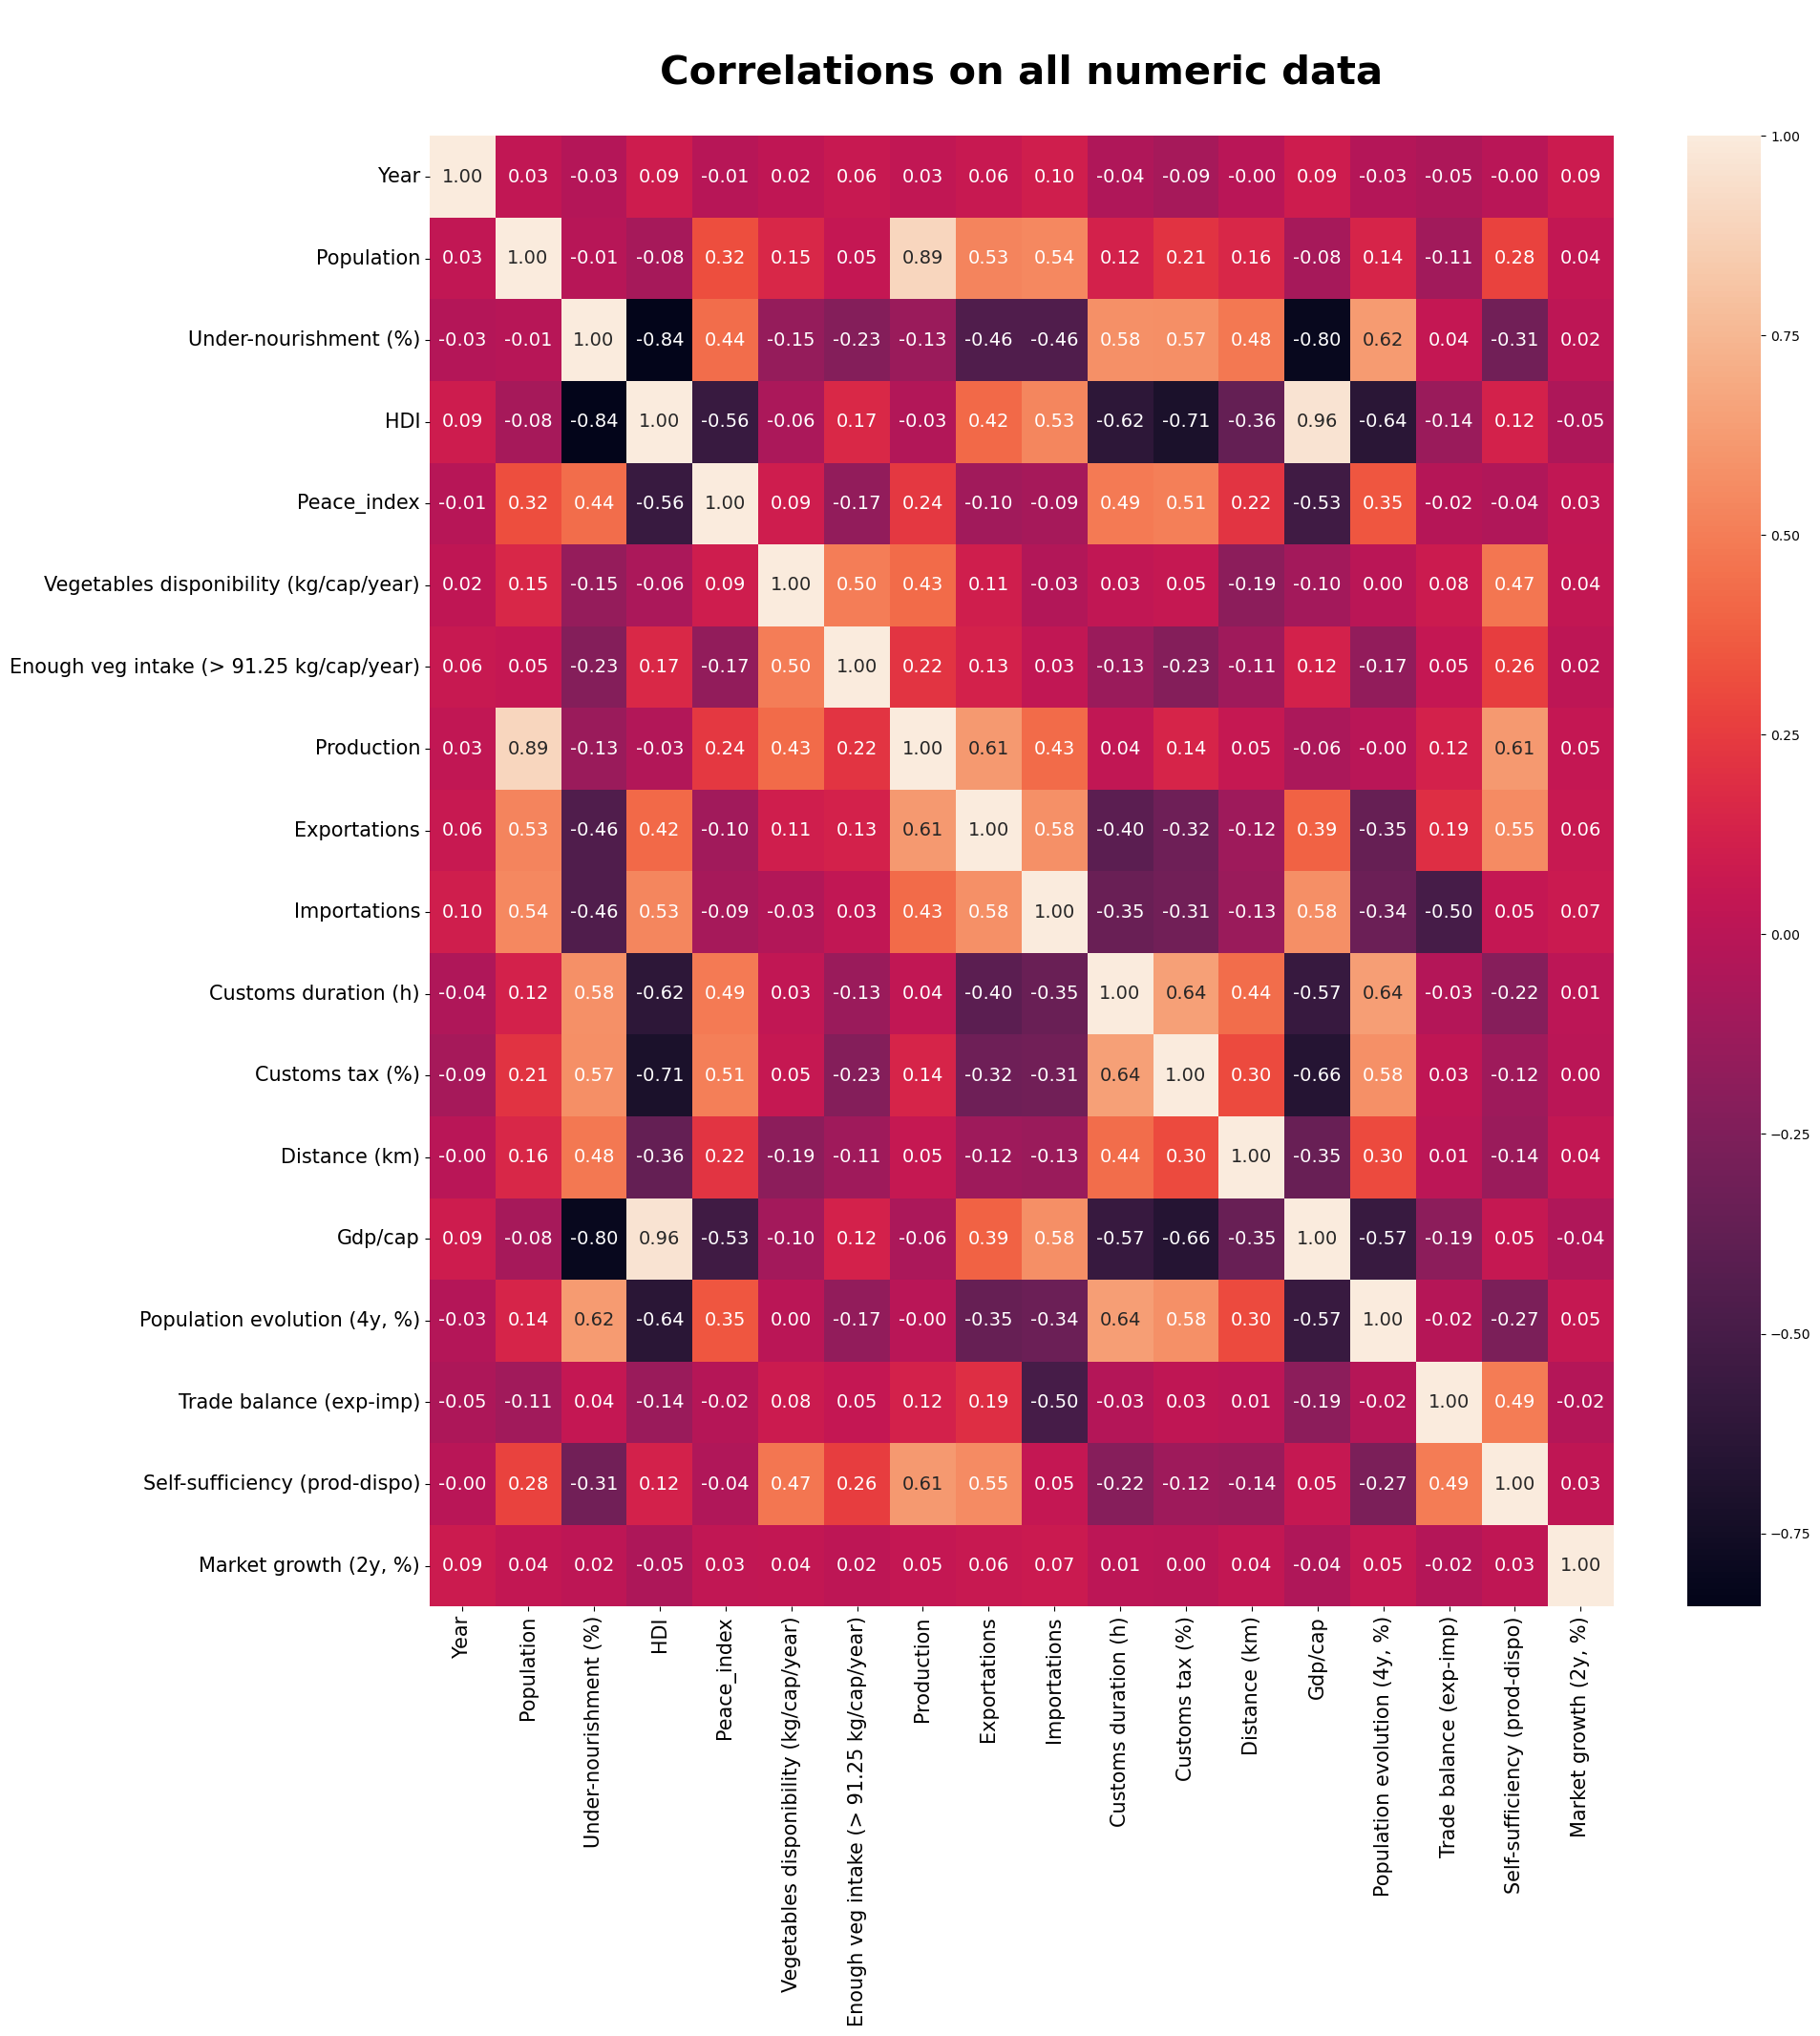

In [68]:
# visualisation des corrélations
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(method='spearman'), annot=True, annot_kws={"size": 14}, fmt=".2f")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nCorrelations on all numeric data\n", size=30, fontweight='bold' )
plt.show()

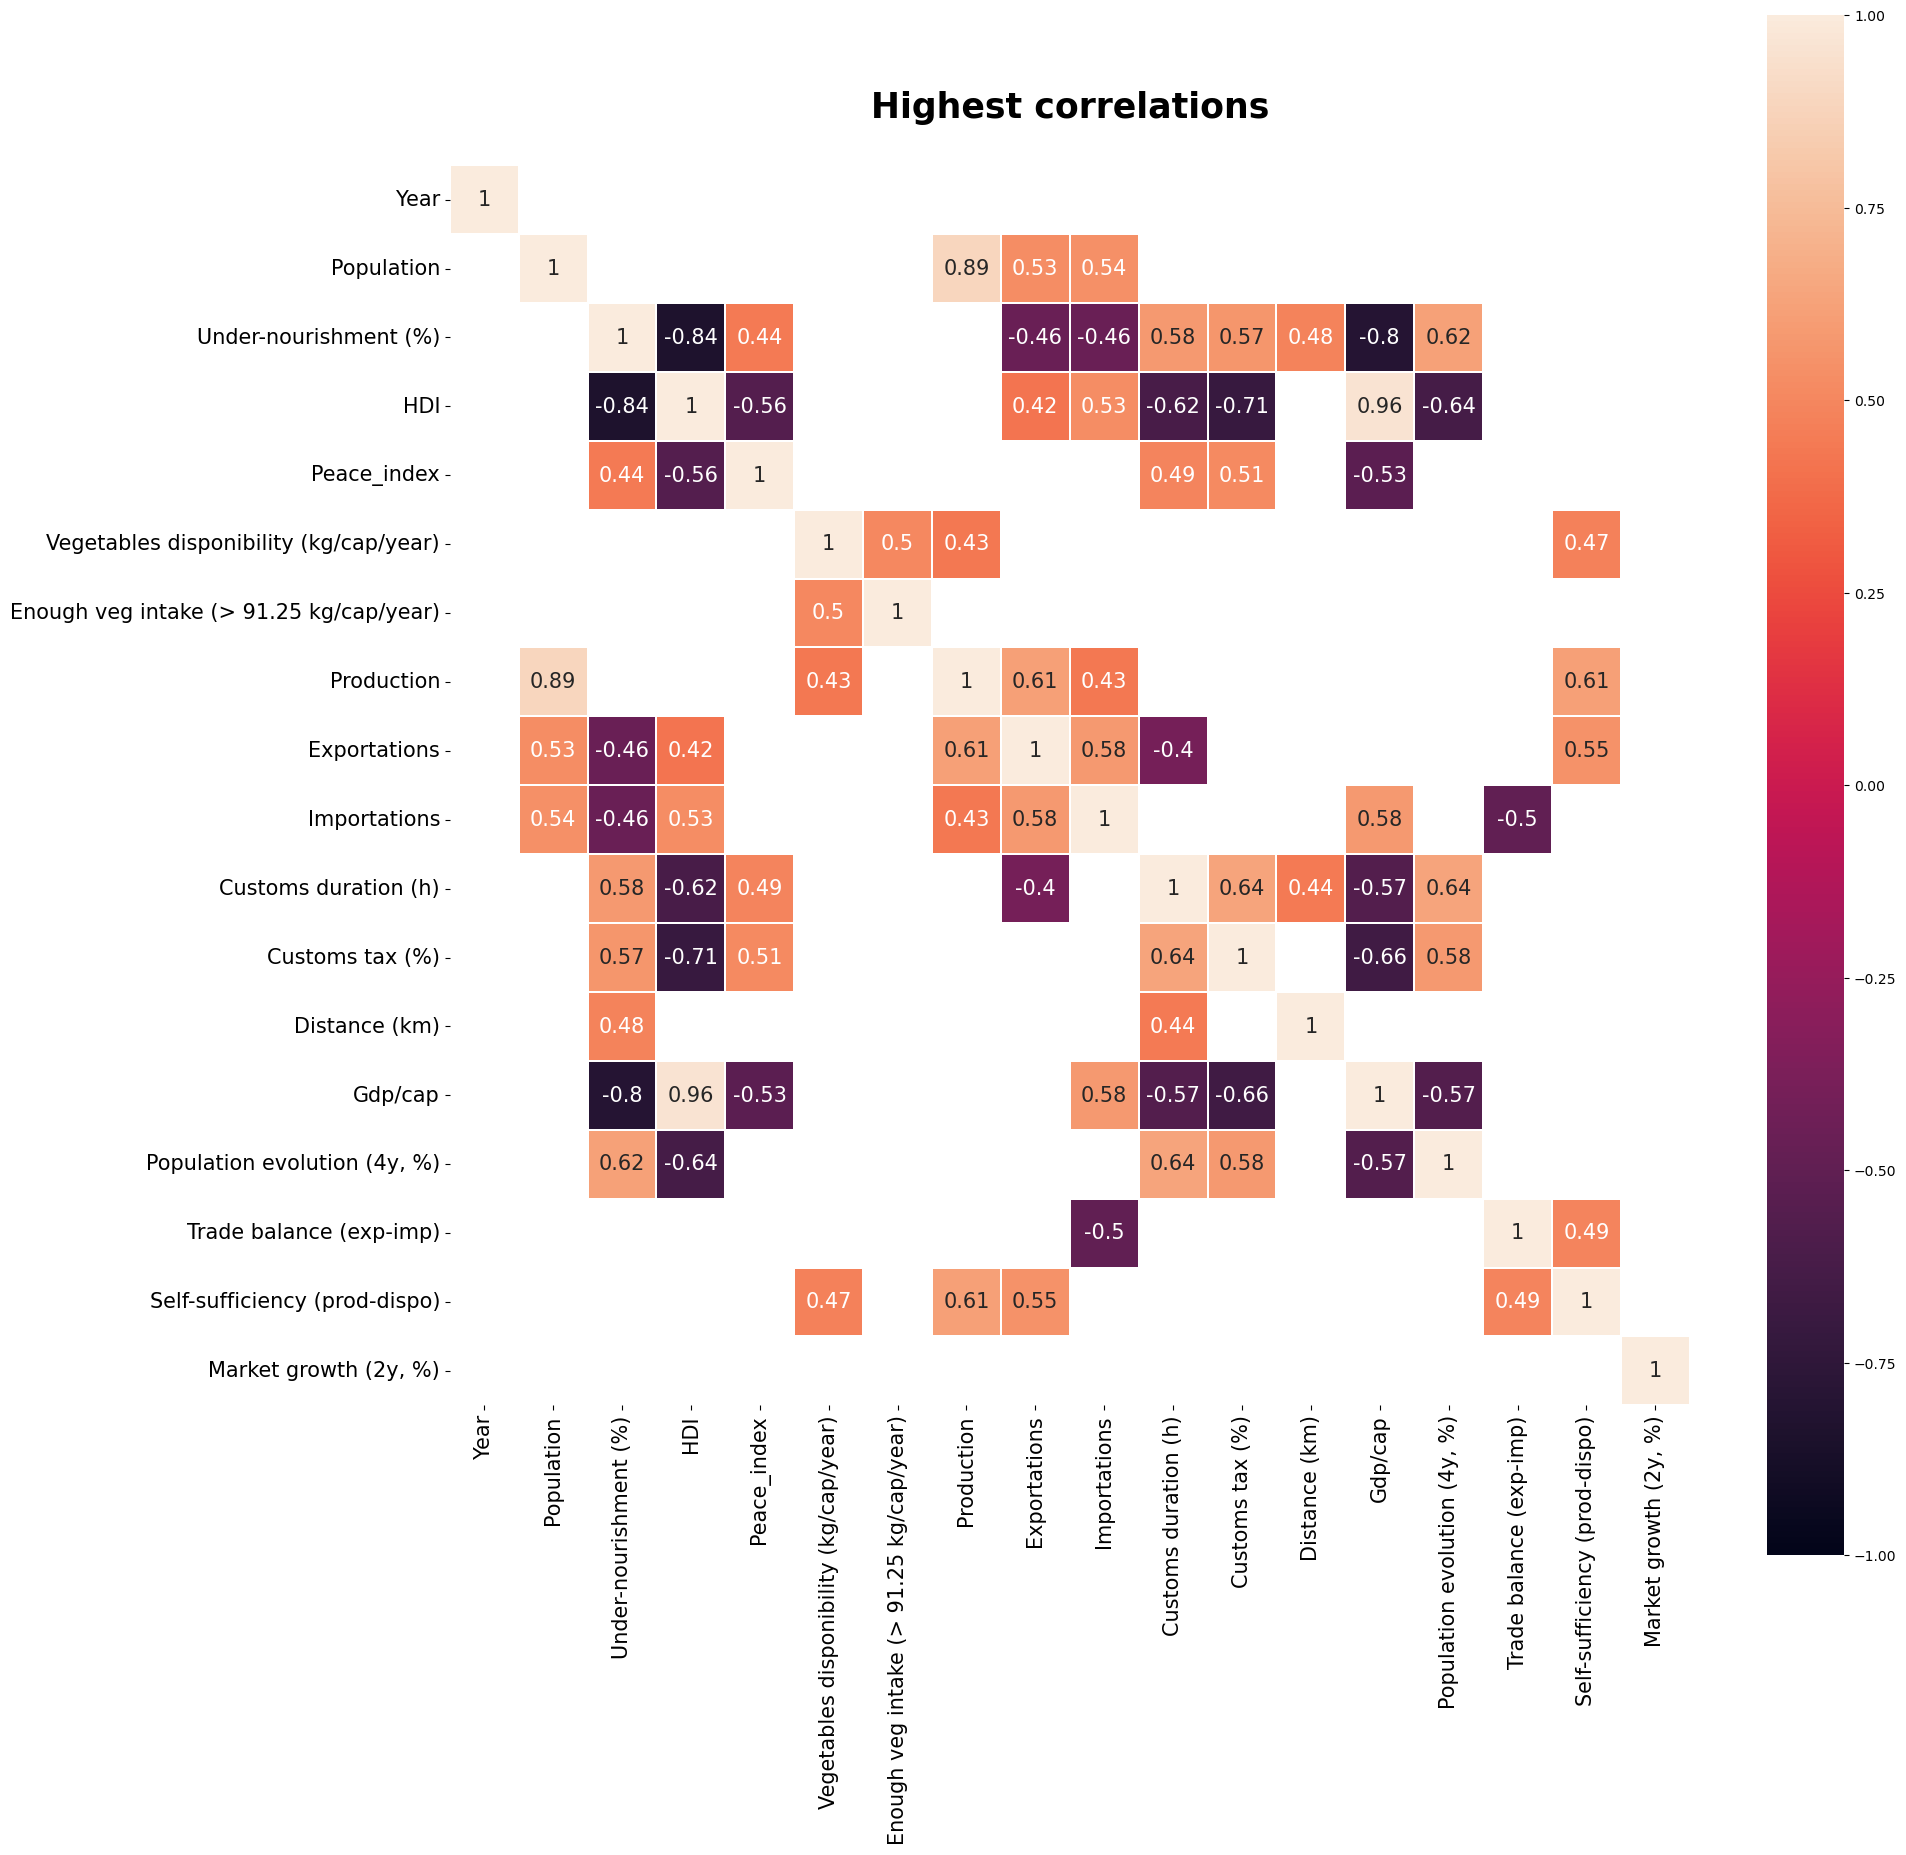

In [69]:
# beaucoup d'informations, on va visualiser les corrélations les plus élevées
corr = final_df.corr(method='spearman')

plt.figure(figsize=(20, 20))
sns.heatmap(np.round(corr, 2)[(corr >= 0.4) | (corr <= -0.4)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nHighest correlations\n", size=25, fontweight='bold' );

# Overview of the final dataset

In [70]:
# dimensions du DataFrame
final_df.shape

(1587, 20)

In [71]:
# création du visuel du DataFrame final
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "background-color: #DC7633; font-style: italic; color: white; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #DC7633; color: white; text-align: center"
}

properties = {"border": "1px solid black", "width": "90px", "text-align": "center"}

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

final_df.sample(10).style.format(precision=2).set_table_styles(
    styles, [cell_hover, index_names, headers]).set_properties(**properties).set_caption('Final DataFrame')

,iso,Country,Year,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
1039,UGA,Uganda,2017,40127085,18.09,0.52,2.11,212.52,1,10370000000,816000000,125000000,64.00,11.71,5867.33,2128.40,13.76,691000000,45.91,26.26
543,GEO,Georgia,2016,3727505,8.30,0.79,2.11,126.96,1,701000000,31000000,218000000,6.00,1.23,3263.44,12858.48,-0.04,-187000000,61.10,7.39
154,BOL,Bolivia,2010,10223270,20.40,0.66,2.12,153.40,1,2743000000,166000000,89000000,48.00,9.76,9905.80,5079.38,7.13,77000000,114.91,0.00
721,KGZ,Kyrgyz Republic,2018,6322800,5.40,0.70,2.16,307.35,1,3644000000,100000000,63000000,5.00,3.88,5490.01,5255.78,8.35,37000000,268.98,70.27
492,GHA,Ghana,2018,30870641,6.20,0.62,1.73,476.30,1,32409000000,40000000,250000000,108.00,12.39,4505.98,5247.69,9.48,-210000000,573.53,-3.85
1076,PNG,Papua New Guinea,2010,7583269,26.20,0.50,2.09,195.07,1,1599000000,0,7000000,42.00,5.12,14488.95,2930.77,13.04,-7000000,15.79,0.00
953,NAM,Namibia,2019,2446644,18.90,0.64,1.89,101.02,1,151000000,42000000,267000000,120.00,7.26,7775.10,10432.03,7.18,-225000000,-39.30,74.51
522,GNB,Guinea-Bissau,2016,1834552,17.63,0.48,2.22,54.06,0,110000000,7000000,9000000,118.00,13.39,4254.59,1697.13,11.00,-2000000,5.90,80.00
1585,ETH,Ethiopia,2019,114120594,21.90,0.50,2.52,113.80,1,16815000000,358000000,213000000,50.91,17.83,5368.91,2273.73,11.37,145000000,33.54,18.33
1036,UGA,Uganda,2014,36336539,17.00,0.51,2.21,235.57,1,10109000000,250000000,46000000,84.75,12.16,5867.33,2121.45,12.35,204000000,42.63,-41.03


<span style="color:red">**=> Le dataset final contient 20 variables et 1587 observations**</span>

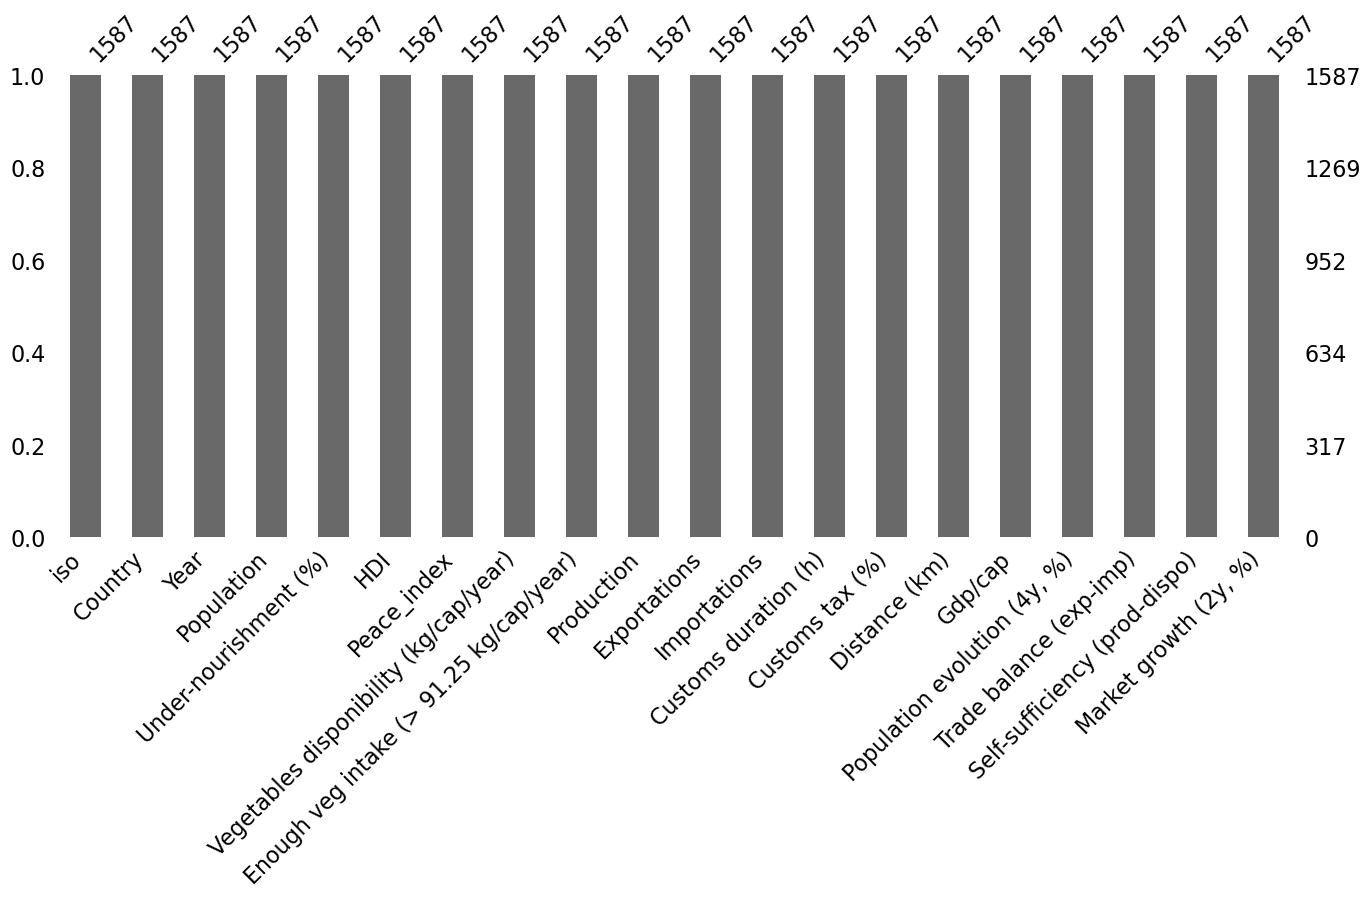

In [72]:
# vérification des NaNs
msno.bar(final_df, figsize=(16,6))
plt.show()

In [73]:
# agrégation des données par année
df_2020 = final_df.loc[final_df['Year'] == 2020].drop(columns='Year')
df_2019 = final_df.loc[final_df['Year'] == 2019].drop(columns='Year')
df_2018 = final_df.loc[final_df['Year'] == 2018].drop(columns='Year')
df_2017 = final_df.loc[final_df['Year'] == 2017].drop(columns='Year')
df_2016 = final_df.loc[final_df['Year'] == 2016].drop(columns='Year')
df_2015 = final_df.loc[final_df['Year'] == 2015].drop(columns='Year')
df_2014 = final_df.loc[final_df['Year'] == 2014].drop(columns='Year')
df_2013 = final_df.loc[final_df['Year'] == 2013].drop(columns='Year')
df_2012 = final_df.loc[final_df['Year'] == 2012].drop(columns='Year')
df_2011 = final_df.loc[final_df['Year'] == 2011].drop(columns='Year')
df_2010 = final_df.loc[final_df['Year'] == 2010].drop(columns='Year')

# Exportation of the final dataframes

In [74]:
final_df.to_csv('src/df_cleaned.csv', index=False)
df_2020.to_csv('src/df_2020_cleaned.csv', index=False)
df_2019.to_csv('src/df_2019_cleaned.csv', index=False)
df_2018.to_csv('src/df_2018_cleaned.csv', index=False)
df_2017.to_csv('src/df_2017_cleaned.csv', index=False)
df_2016.to_csv('src/df_2016_cleaned.csv', index=False)
df_2015.to_csv('src/df_2015_cleaned.csv', index=False)
df_2014.to_csv('src/df_2014_cleaned.csv', index=False)
df_2013.to_csv('src/df_2013_cleaned.csv', index=False)
df_2012.to_csv('src/df_2012_cleaned.csv', index=False)
df_2011.to_csv('src/df_2011_cleaned.csv', index=False)
df_2010.to_csv('src/df_2010_cleaned.csv', index=False)
print("Exportation terminée")

Exportation terminée
